## 1. Exploring the raster Images

- In this code segment, I explore the Digtal Surface Model(dsm) and the Digtal Terrain Model(dtm).
- Useful information on the raster images is generated, such as :

    - Image bounds, 
    - Coordinate refrence system (crs)
    - Displaying image array
    - Images of the untransformed and transformed rasters are displayed

In [25]:
#import relevant libraries
#generates interactive plots/graphs
# %matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
import gdal
import rasterio

In [26]:
#Exploring info of Digtal Surface Model(dsm) 

path1 = 'C:/Users/makye/Downloads/geotiff/DSM/ExtractedDSM/DHMVIIDSMRAS1m_k01/GeoTIFF/DHMVIIDSMRAS1m_k01.tif'
dsm  = rasterio.open(path1)
array_dsm = dsm.read(1) #Raster array
array_dsm.size
dsm.crs #Coordinate refrence system of dsm
dsm.count #number of bands
print(dsm.width, dsm.height) #Height vs Widith
dsm.bounds #checks bounds of ds

17000 9000


BoundingBox(left=145000.0, bottom=238000.0, right=162000.0, top=247000.0)

<IPython.core.display.Javascript object>


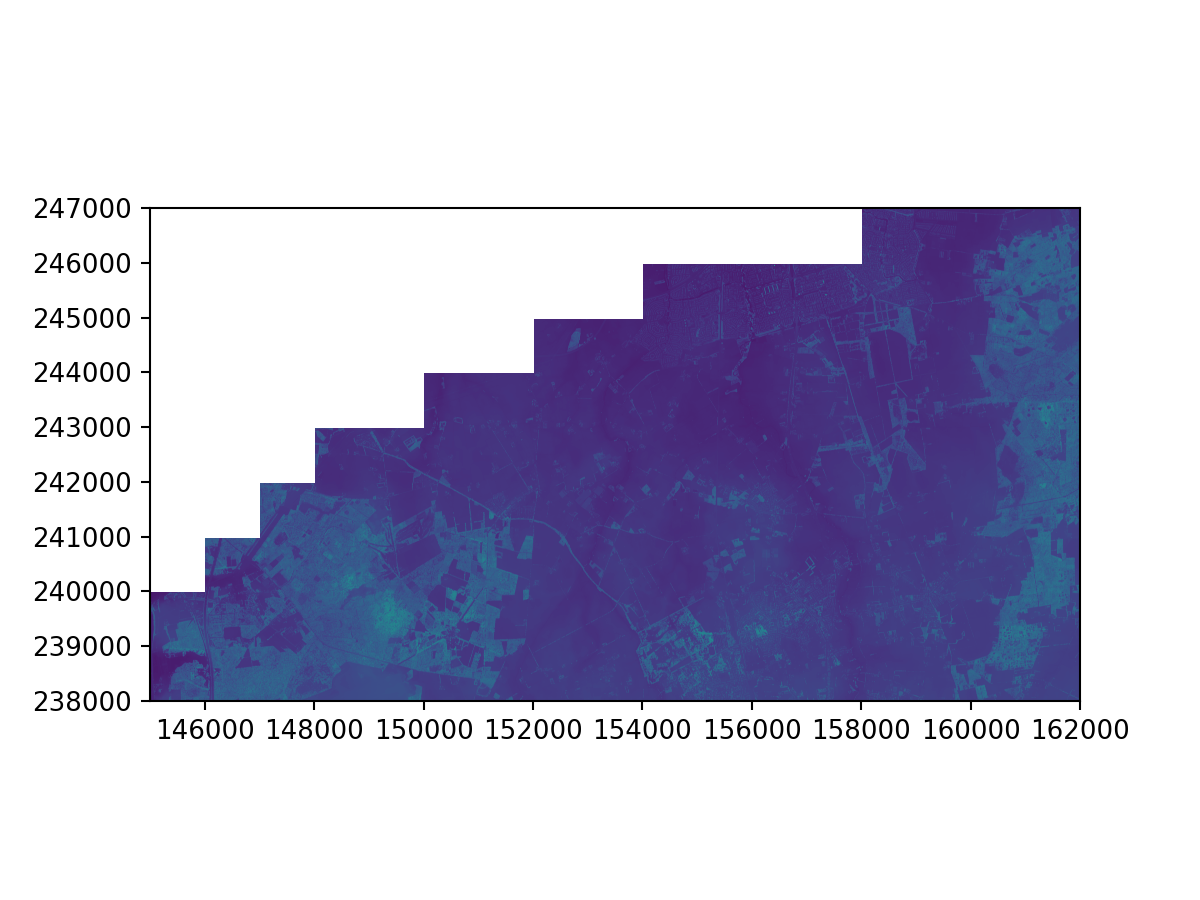

<AxesSubplot:>

In [28]:
#Untransformed dsm
from rasterio.plot import show
show(dsm)


<IPython.core.display.Javascript object>


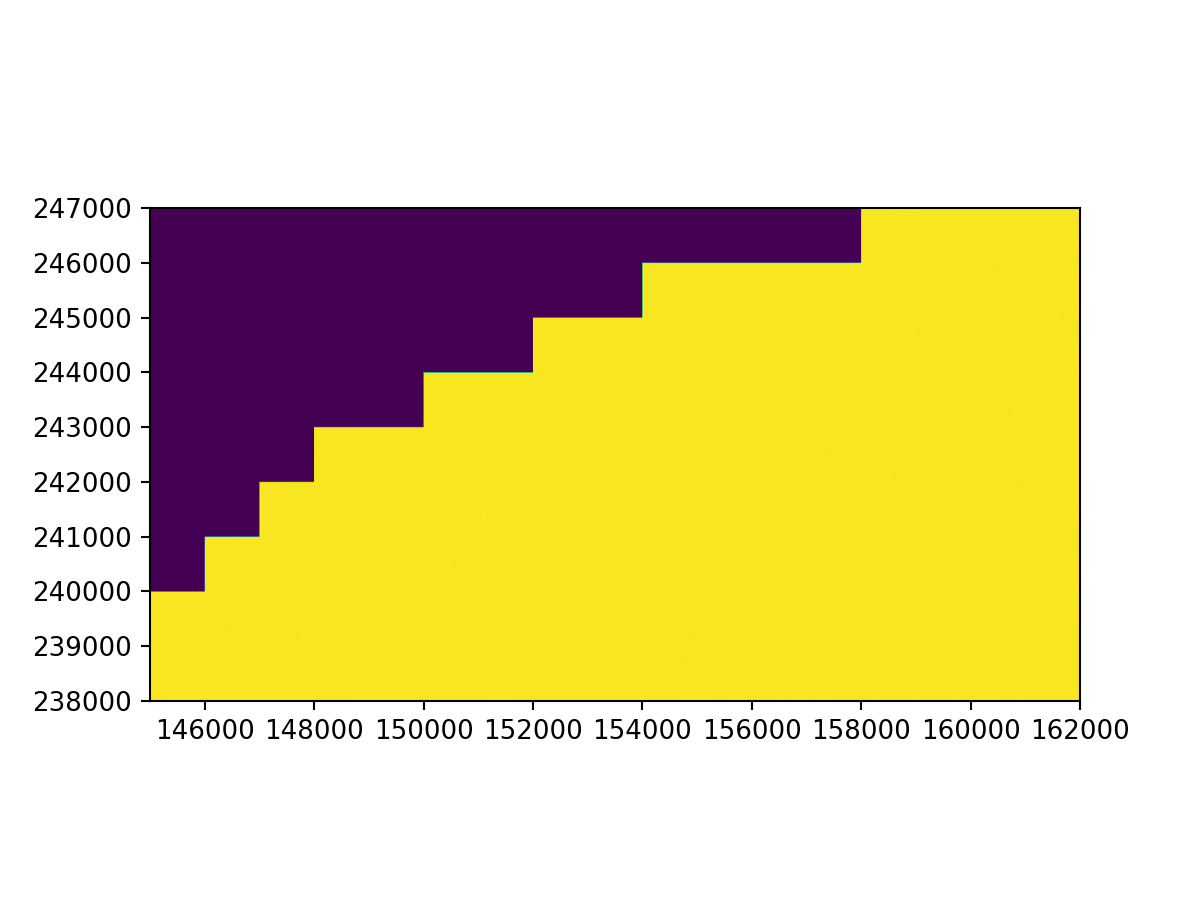

<AxesSubplot:>

In [29]:
#transformed dsm
from rasterio.plot import show
show(dsm.read(), transform=dsm.transform)

In [30]:
#Exploring info of Digtal Terrain Model(dtm)

path2 = 'C:/Users/makye/Downloads/geotiff/DTM/DHMVIIDTMRAS1m_k01/GeoTIFF/DHMVIIDTMRAS1m_k01.tif'
dtm  = rasterio.open(path2)
array_dtm = dtm.read(1) #Raster array
array_dtm.size
dtm.crs #Coordinate refrence system
dtm.count #number of bands
print(dtm.width, dtm.height)#Height vs Widith
dtm.bounds #checks bounds of tiff image


17000 9000


BoundingBox(left=145000.0, bottom=238000.0, right=162000.0, top=247000.0)

<IPython.core.display.Javascript object>


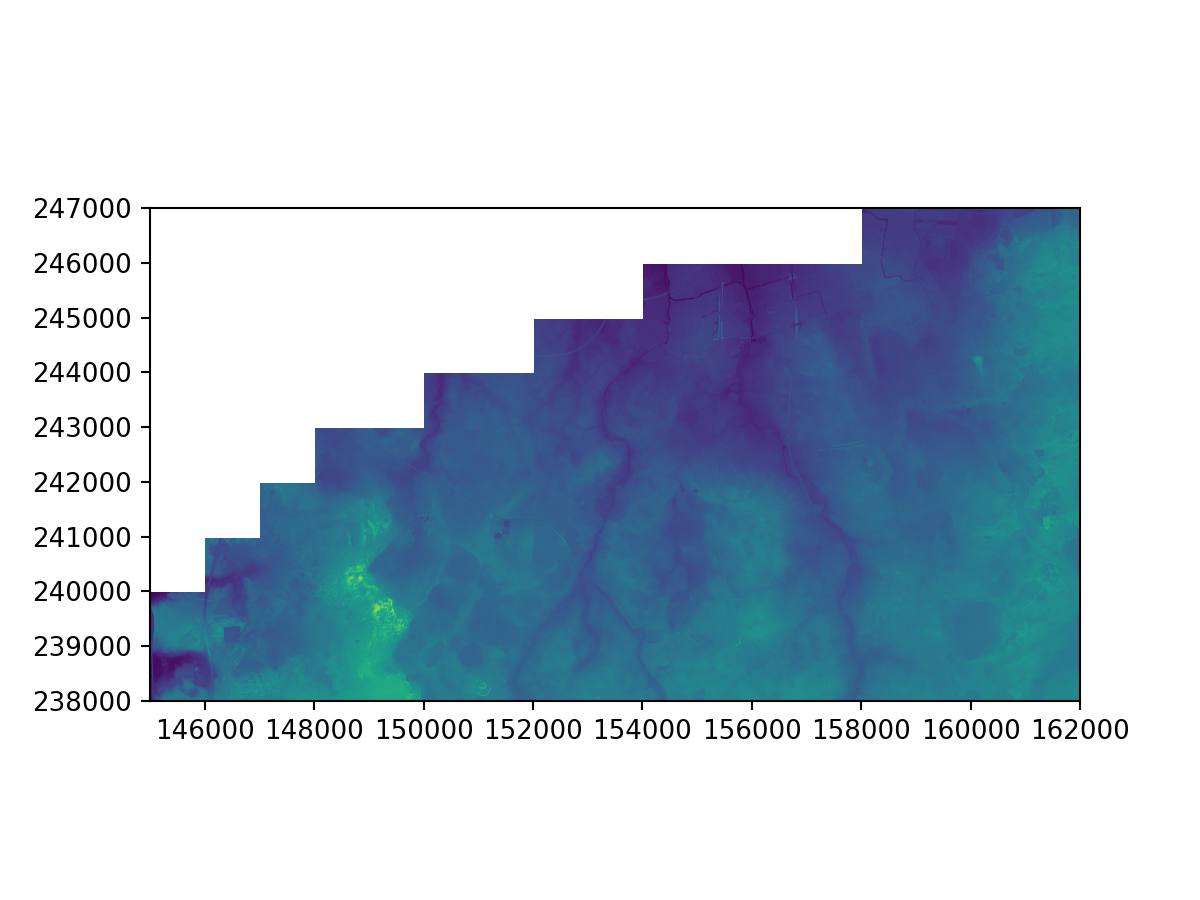

<AxesSubplot:>

In [31]:
#Untransformed dtm
from rasterio.plot import show
show(dtm)

<IPython.core.display.Javascript object>


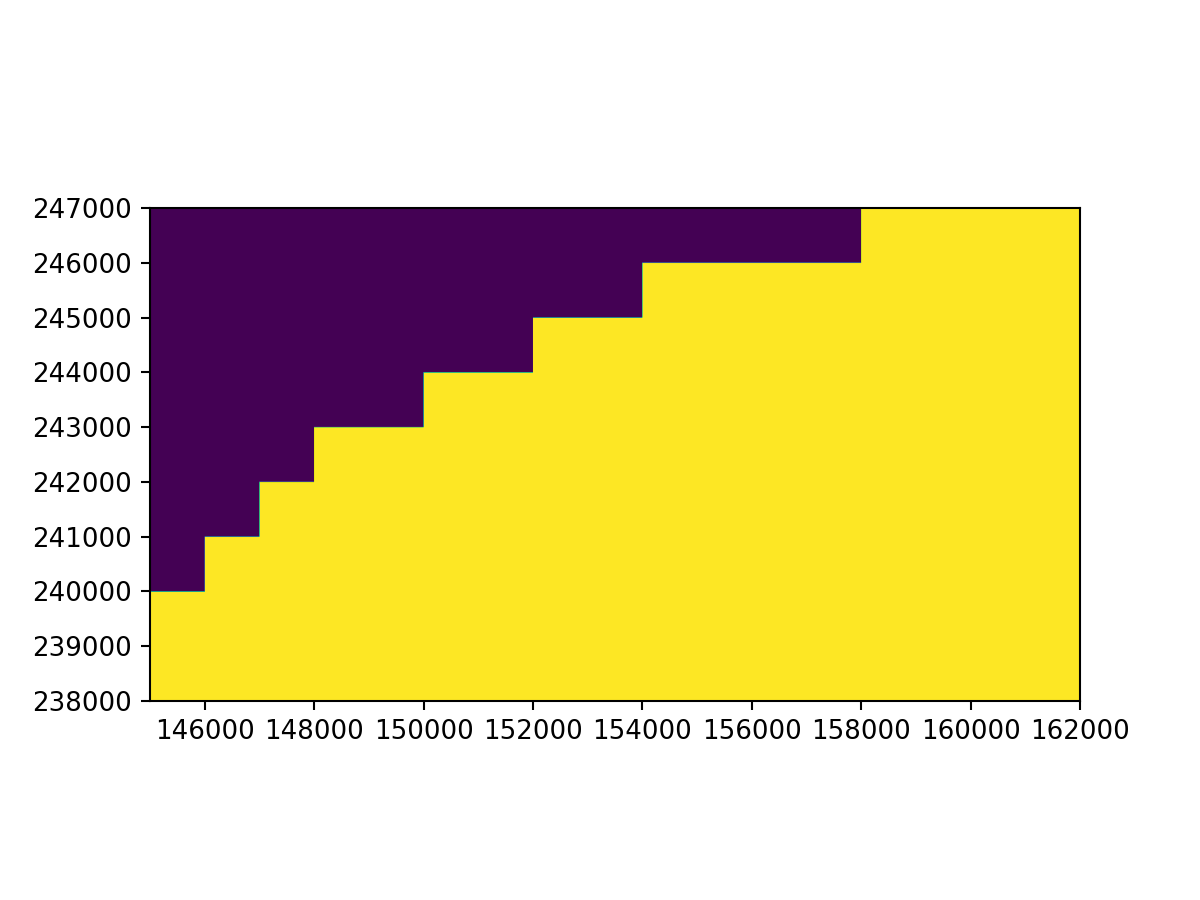

<AxesSubplot:>

In [32]:
#transformed dtm
from rasterio.plot import show
show(dtm.read(), transform=dtm.transform)

## 2. Obtaining the Canopy Hieght Model (chm)

- Under this code segment, the chm is generated by subtracting dtm array from the dsm array
- A 2D plot of the chm is generated for visual exploration
- The created raster of the chm is exported to a target local directory

<IPython.core.display.Javascript object>


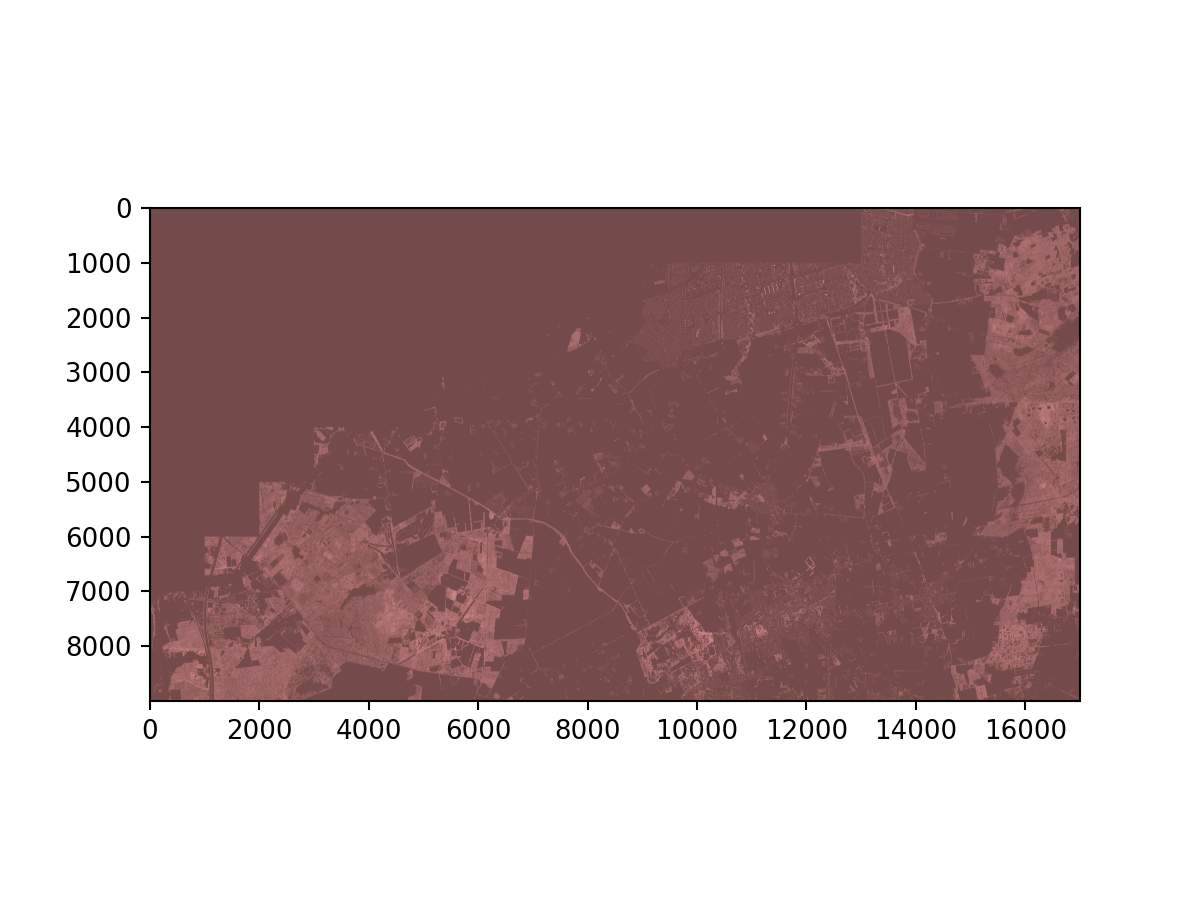

In [33]:
#from above, DSM and DTM are of same size i.e 153000000 & bounds

#Array for the canopy height model(chm)
array_chm = array_dsm - array_dtm

#Plotting canopy height model
plt.imshow(array_chm, cmap='pink')


In [34]:
#writing and exporting chm

#Adapting output chm to dimesions of dsm
dsm_transform = dsm.transform
dsm_crs = dsm.crs

new_dataset = rasterio.open(
       'C:/Users/makye/Downloads/geotiff/CHM/chm.tif',
       'w',
       driver='GTiff',
       height=array_chm.shape[0],
       width=array_chm.shape[1],
       count=1,
       dtype=array_chm.dtype,
       crs=dsm_crs,
       transform=dsm_transform,
)  

new_dataset.write(array_chm, 1)
new_dataset.close()

In [35]:
#openign & potting  chm
path3 = 'C:/Users/makye/Downloads/geotiff/CHM/chm.tif'
chm  = rasterio.open(path3)


## 3. Generating polygon of input home address
- Under this code segment:
    - from the API: basisregisters.vlaanderen.be
    - I use the requests & Json libraries to obtain polygon coordinates of input home address 
    - The generated polygon shapefile is exported to target directory
    

In [39]:
#Libraries to extarct polygon from house address
import requests
import json
import geopandas as gpd


In [37]:
#Retriving details of house address
url1 = 'https://api.basisregisters.vlaanderen.be/v1/adresmatch'
address = requests.get(url1, 
                      params={'postcode':2910, 
                              'straatnaam':'Raaiberg', 'huisnummer':47})
address.json()

#get building block ID
url2 = 'https://api.basisregisters.vlaanderen.be/v1/gebouweenheden/9035572'
block = requests.get(url2)
block.json()

#get unit building ID
url3 = 'https://api.basisregisters.vlaanderen.be/v1/gebouwen/9034238'
unit = requests.get(url3)
unit.json()

{'identificator': {'id': 'https://data.vlaanderen.be/id/gebouw/9034238',
  'naamruimte': 'https://data.vlaanderen.be/id/gebouw',
  'objectId': '9034238',
  'versieId': '2011-04-29T13:11:28+02:00'},
 'geometriePolygoon': {'polygon': {'coordinates': [[[160102.70984223485,
      241040.277225215],
     [160112.8624182418, 241039.5322652124],
     [160113.21749024093, 241043.74090521783],
     [160113.44533023983, 241046.44119321927],
     [160103.2254262343, 241047.30352921784],
     [160102.70984223485, 241040.277225215]]],
   'type': 'Polygon'}},
 'geometrieMethode': 'ingemetenGRB',
 'gebouwStatus': 'gerealiseerd',
 'gebouweenheden': [{'objectId': '9035572',
   'detail': 'https://api.basisregisters.vlaanderen.be/v1/gebouweenheden/9035572'}],
 'percelen': [{'objectId': '11016A0945-00Y003',
   'detail': 'https://api.basisregisters.vlaanderen.be/v1/percelen/11016A0945-00Y003'}]}

In [40]:
#generating  and exporting polygon

from shapely.geometry import Polygon

lat_point_list = [160112.8624182418, 160113.21749024093, 
                  160113.44533023983, 160103.2254262343, 160102.70984223485]
lon_point_list = [241039.5322652124, 241043.74090521783, 
                  241046.44119321927, 241047.30352921784, 241040.277225215]

polygon_geom = Polygon(zip(lat_point_list, lon_point_list))
polygon = gpd.GeoDataFrame(index=[0], crs='epsg:31370', geometry=[polygon_geom])       
print(polygon.geometry)

route1 = 'C:/Users/makye/Downloads/geotiff/poly/polygon4.geojson'
route2 = 'C:/Users/makye/Downloads/geotiff/poly/polygon4.shp'
polygon.to_file(route1, driver='GeoJSON')
polygon.to_file(route2, driver='ESRI Shapefile')


0    POLYGON ((160112.862 241039.532, 160113.217 24...
Name: geometry, dtype: geometry


## 4. Plotting the polygon of input home address

<IPython.core.display.Javascript object>


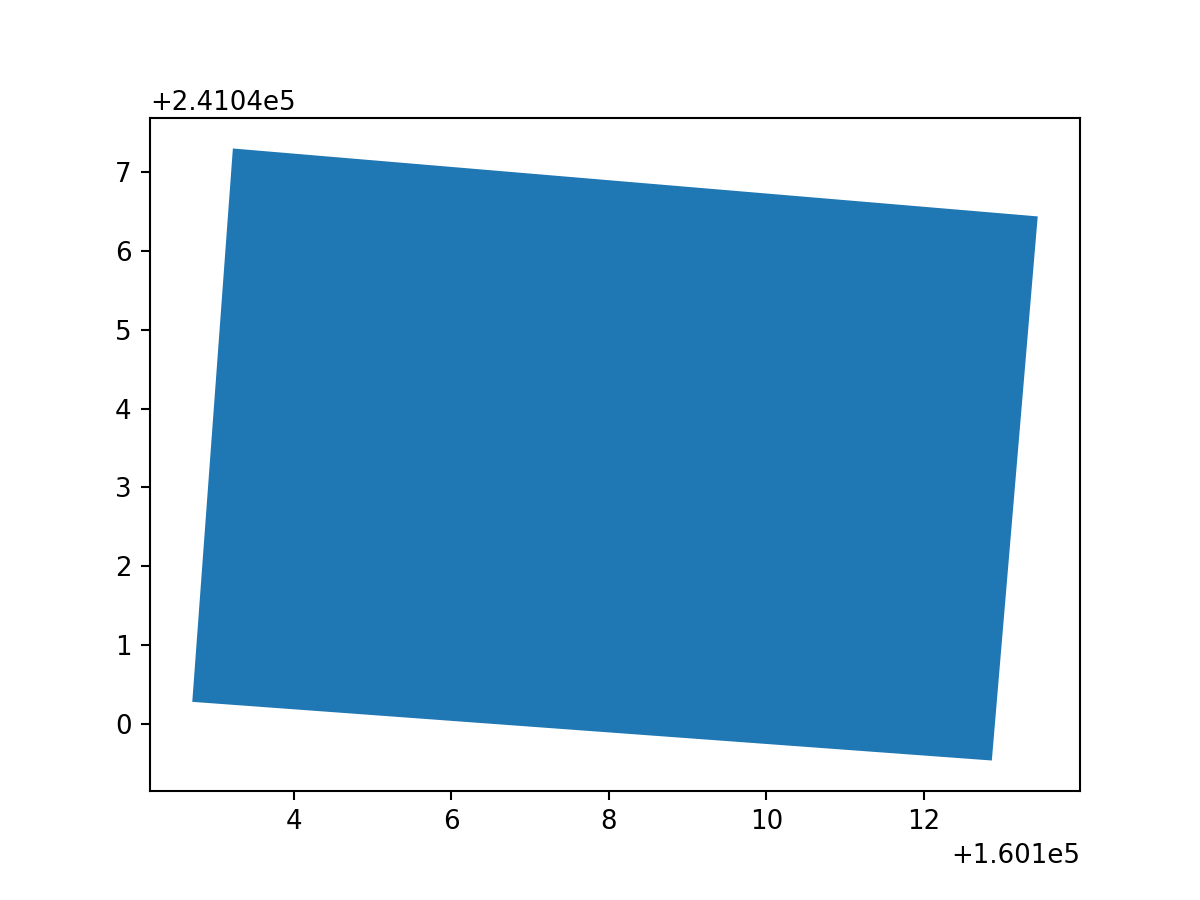

<AxesSubplot:>

In [41]:
#Importing and Plotting polygon


path4='C:/Users/makye/Downloads/geotiff/poly/polygon4.shp'
pol = gpd.read_file(path4)

#Display intial rows of polygon data
pol.head()

#plot polygon
pol.plot(alpha = 1)



## 5. Musking and clipping chm raster using polygon of home address
- In this code segment, I generate a clipped raster of the chm
- and store it in a target directory

In [42]:
#Libraries to musk and clip chm raster using house polygon
from rasterio import plot
from rasterio.mask import mask

In [43]:
#Check projection of raster and Shapefile(polygon) (must have same CRS)
chm.crs
pol.crs

<Projected CRS: EPSG:31370>
Name: Belge 1972 / Belgian Lambert 72
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Belgium - onshore
- bounds: (2.5, 49.5, 6.4, 51.51)
Coordinate Operation:
- name: Belgian Lambert 72
- method: Lambert Conic Conformal (2SP)
Datum: Reseau National Belge 1972
- Ellipsoid: International 1924
- Prime Meridian: Greenwich

<IPython.core.display.Javascript object>


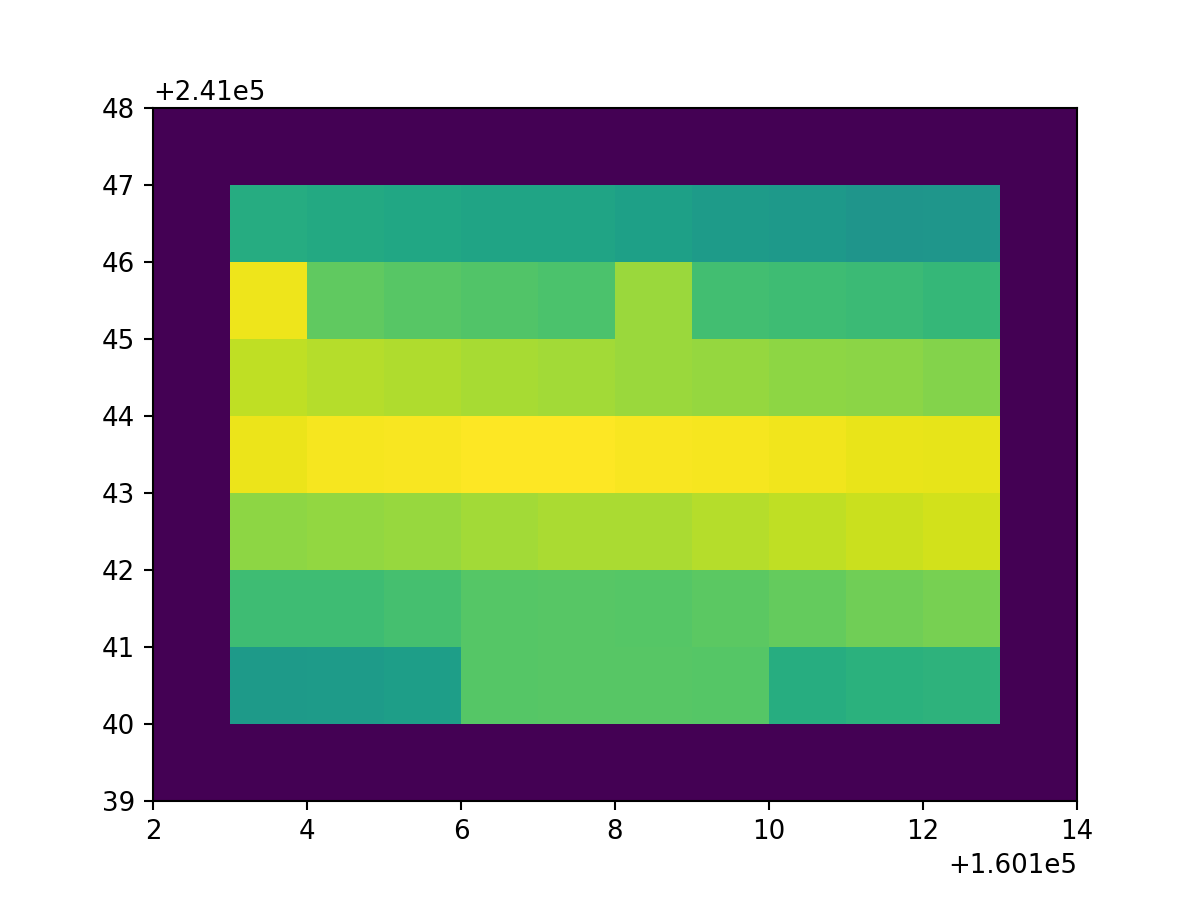

<AxesSubplot:>

In [44]:
#Superimposing, Masking and Clipping CHM raster using house polygon(shapefile) 

masked, mask_transform = mask(dataset=chm,shapes=pol.geometry,crop=True)

#generate 2D plot of clipped chm ratser
show(masked, transform=mask_transform) 


In [45]:
#profile of CHM (summary information on chm raster)
profile = chm.meta
profile

# update dimensions of the clipped ratser relative to dimensions of orignal chm raster
WIDTH = masked.shape[2] 
HEIGHT = masked.shape[1]
profile.update(driver='GTiff', transform=mask_transform, height = HEIGHT, width = WIDTH)

# check on the updated profile
print(profile) 

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 12, 'height': 9, 'count': 1, 'crs': CRS.from_epsg(31370), 'transform': Affine(1.0, 0.0, 160102.0,
       0.0, -1.0, 241048.0)}


In [46]:
#writing & saving clipped raster of CHM
with rasterio.open('C:/Users/makye/Downloads/geotiff/CHM/clip.tif', 'w', **profile) as dst:
    dst.write(masked)

## 6. Generating 3D plot of the input home address
- In this code segment, 3D plots of home adress are generated
- First I use the matplotlib library (several formarts of plots are displayed)
- Then I use the Plotly library 

### 3D plot in matplotlib

In [71]:
# Libraries to plot 3D graph
from mpl_toolkits.mplot3d.axes3d import *


In [72]:
#Import, examine and geo-transform clipped raster 

path5 = 'C:/Users/makye/Downloads/geotiff/CHM/clip.tif'

clipped = gdal.Open(path5)
array = clipped.ReadAsArray()
gt = clipped.GetGeoTransform()
print(gt)

(160102.0, 1.0, 0.0, 241048.0, 0.0, -1.0)


<IPython.core.display.Javascript object>


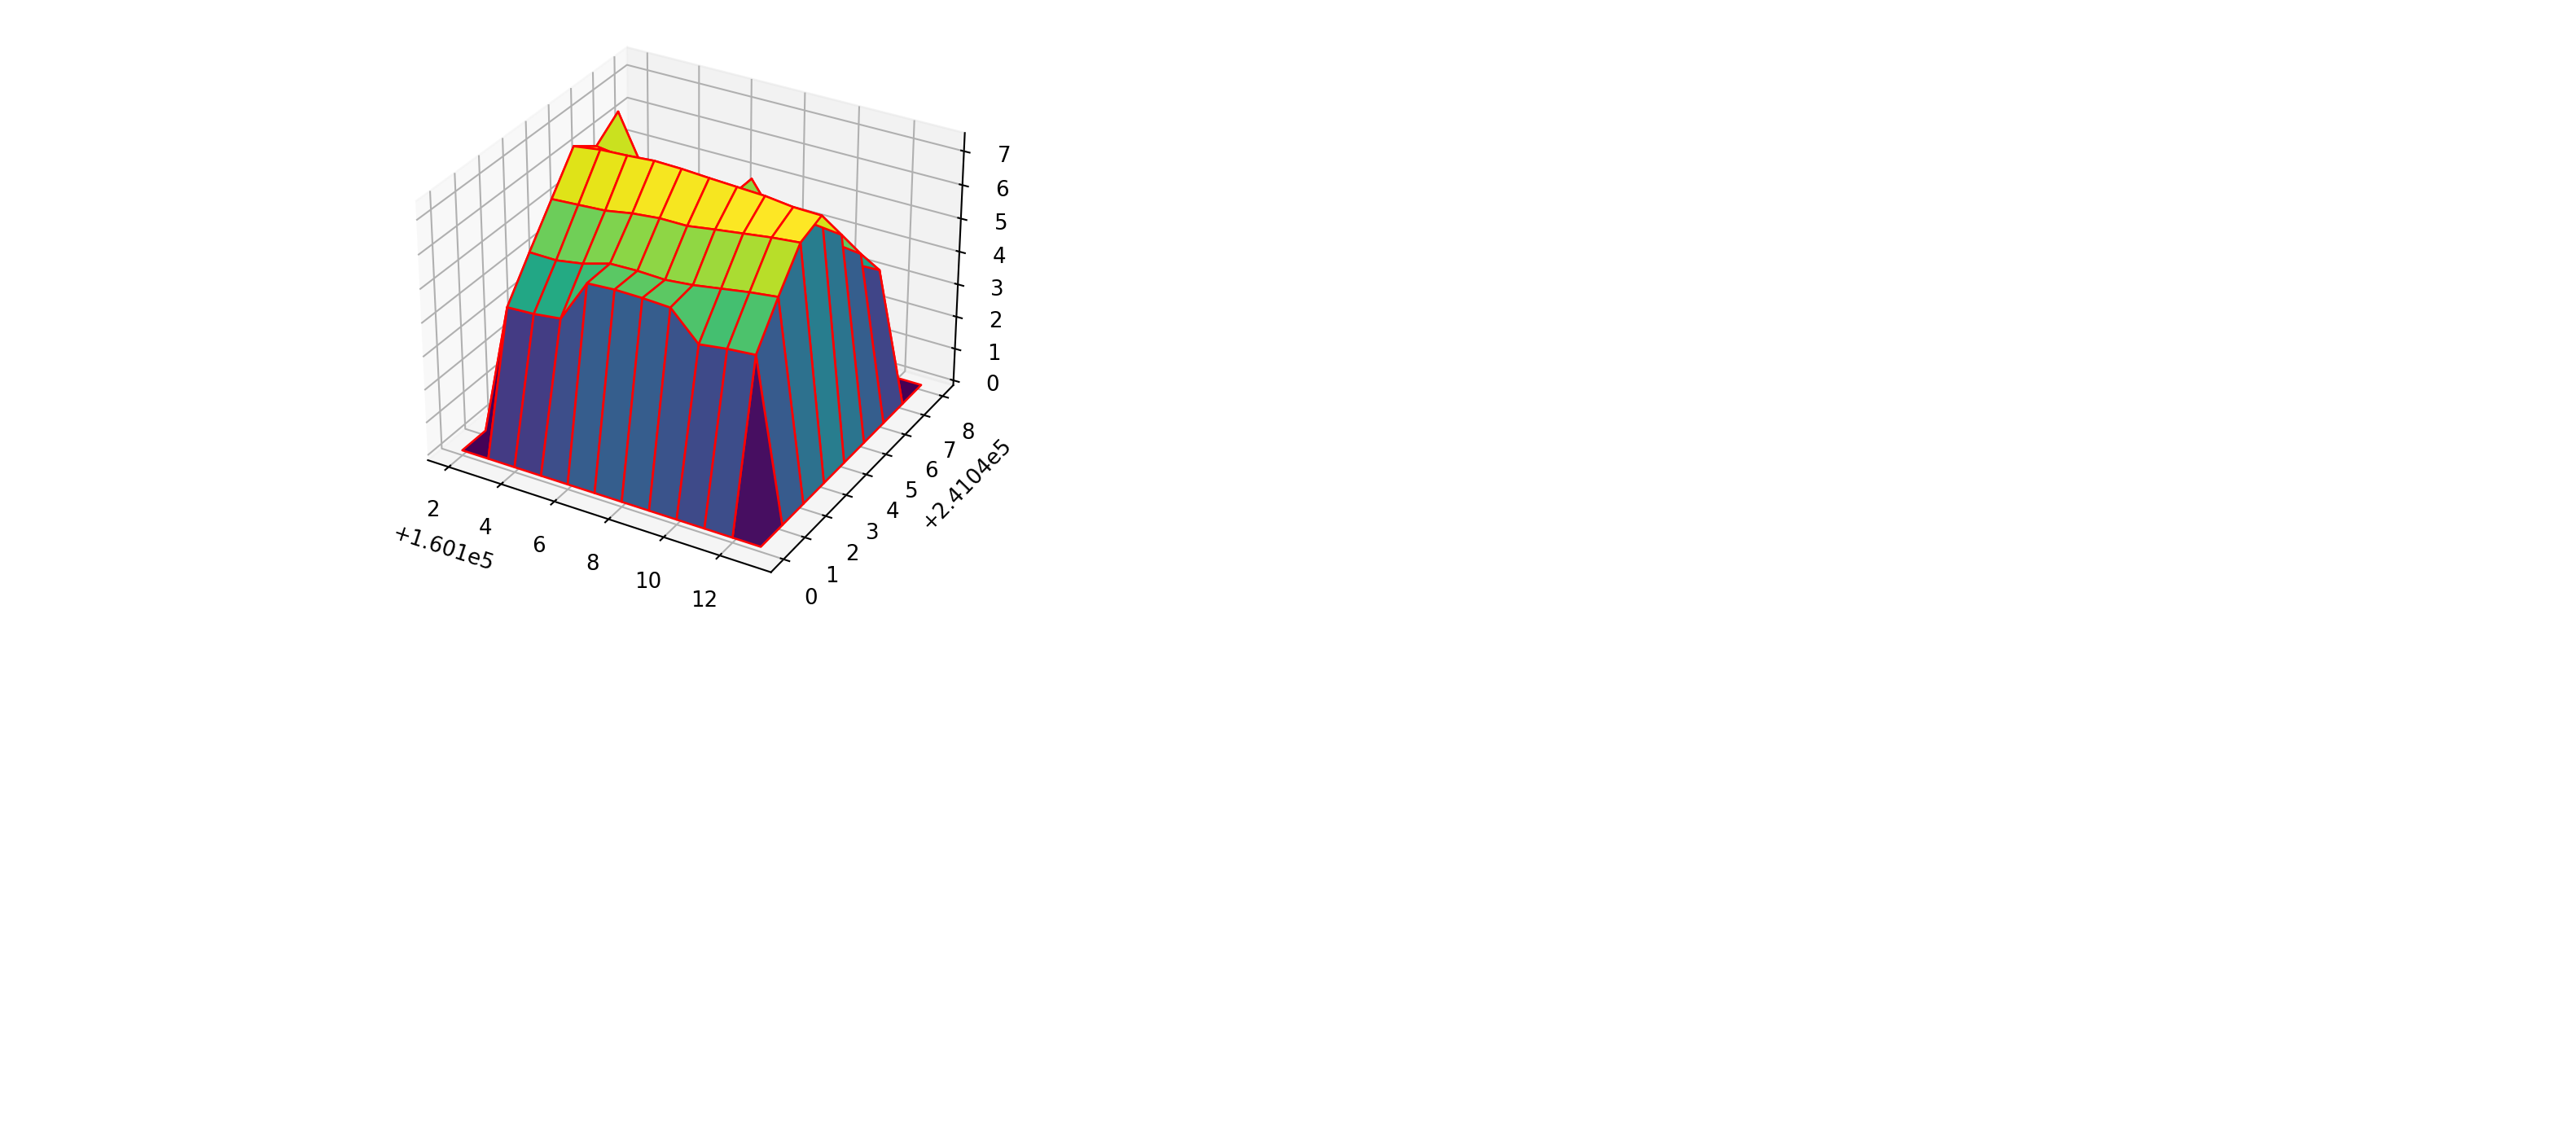

In [78]:
# transformation of coordinates
xres = gt[1]
yres = gt[5]
X = np.arange(gt[0], gt[0] + array.shape[1]*xres, xres)
Y = np.arange(gt[3], gt[3] + array.shape[0]*yres, yres)
 
# generate a  mesh grid 
X, Y = np.meshgrid(X, Y)
 
    
# plot the raster
fig = plt.figure(1, figsize = (9,4))
ax = Axes3D(fig)
ax.plot_surface(X,Y,array,rstride=1, cstride=1,
                cmap='viridis', edgecolor='red'); 




<IPython.core.display.Javascript object>


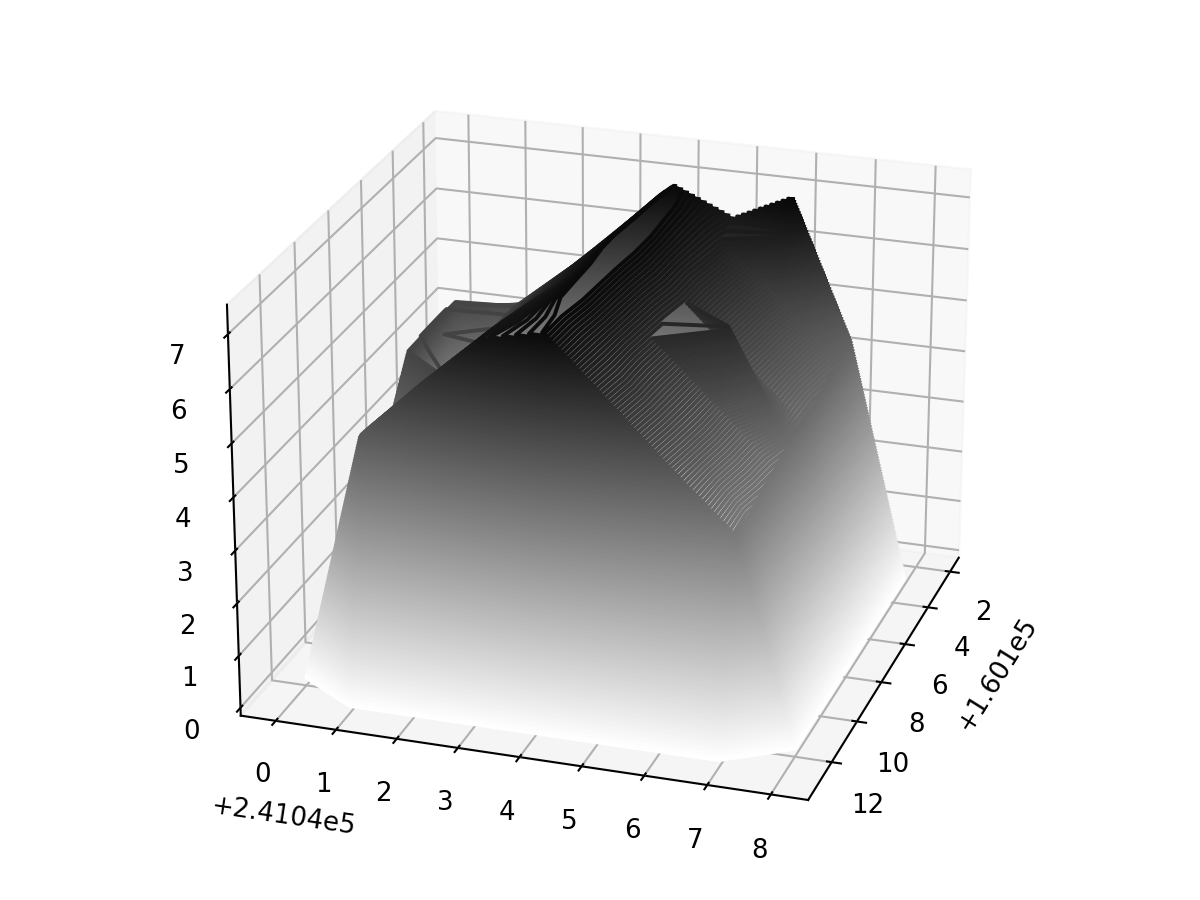

In [63]:
# Contour plot of home address
fig = plt.figure()
ax = Axes3D(fig)
ax.contour3D(X,Y,array, 150,cmap='binary');  

<IPython.core.display.Javascript object>


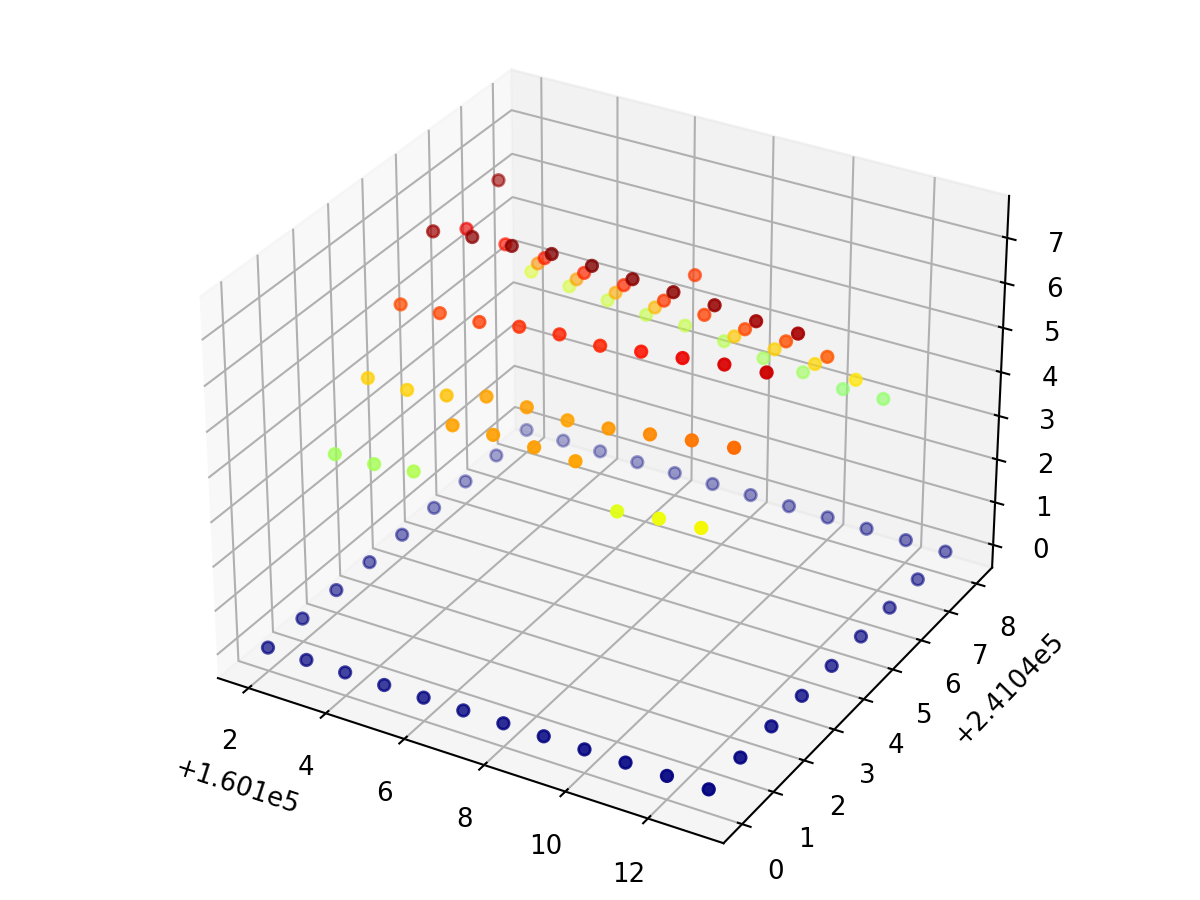

In [70]:
#Scatter plot of home address
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter3D(X,Y,array,c=array,cmap=plt.cm.jet, linewidth=1);  

### 3D in Plotly

In [55]:
#Using plotly
import plotly.graph_objects as go
import numpy as np

array = clipped.ReadAsArray()
X = np.arange(gt[0], gt[0] + array.shape[1]*xres, xres)
Y = np.arange(gt[3], gt[3] + array.shape[0]*yres, yres)
 
fig = go.Figure(data=[go.Surface(z=array)])
fig.update_layout(title='Raaiberg 47-2910-Essen', autosize=False,
                  width=500, height=500,
                  scene = dict(
                    xaxis_title='Distance (m)',
                    yaxis_title='Distance (m)',
                    zaxis_title='Height'),
                  margin=dict(l=65, r=50, b=65, t=90))
fig.update_scenes(yaxis_autorange="reversed")
fig.show()



